<a href="https://colab.research.google.com/github/timnll/ProjetBigData/blob/master/NYC_Taxi_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA**

### *Import librairies*

In [0]:
from __future__ import print_function

import pandas as pd
import numpy as np
import yaml
import time, datetime
import os.path, sys
from matplotlib.pyplot import figure

# MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Import data

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1bJbQgQae2zuWdeN4J-v67YNmFRdaxCph' #shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yellow_tripdata_2019-01.csv')  
datas_2019_01 = pd.read_csv('yellow_tripdata_2019-01.csv')
# Dataset is now stored in a Pandas Dataframe
print (datas_2019_01)

1bJbQgQae2zuWdeN4J-v67YNmFRdaxCph
         VendorID tpep_pickup_datetime  ... total_amount  congestion_surcharge
0               1  2019-01-01 00:46:40  ...         9.95                   NaN
1               1  2019-01-01 00:59:47  ...        16.30                   NaN
2               2  2018-12-21 13:48:30  ...         5.80                   NaN
3               2  2018-11-28 15:52:25  ...         7.55                   NaN
4               2  2018-11-28 15:56:57  ...        55.55                   NaN
5               2  2018-11-28 16:25:49  ...        13.31                   NaN
6               2  2018-11-28 16:29:37  ...        55.55                   NaN
7               1  2019-01-01 00:21:28  ...         9.05                   NaN
8               1  2019-01-01 00:32:01  ...        18.50                   NaN
9               1  2019-01-01 00:57:32  ...        13.00                   NaN
10              1  2019-01-01 00:24:04  ...        19.55                   NaN
11              1 

### *Clean data*

In [0]:
runs_2019_01 = datas_2019_01.copy()
runs_2019_01.columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge']

useless_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge']
runs_2019_01 = runs_2019_01.drop(columns=useless_columns)
runs_2019_01['tpep_pickup_datetime'] = pd.to_datetime(runs_2019_01['tpep_pickup_datetime'])
runs_2019_01['tpep_dropoff_datetime'] = pd.to_datetime(runs_2019_01['tpep_dropoff_datetime'])
runs_2019_01
#print(runs_2019_01)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55
5,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.00,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31
6,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00


# **TRAITEMENT**

### *Hour frequency*

[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]
[207696, 149228, 109412, 78062, 61128, 74730, 176811, 302794, 371880, 364444, 359895, 374053, 399446, 402564, 431225, 450523, 418714, 466639, 514184, 474489, 422564, 409340, 368538, 281426]


Text(0.5,0,'hours')

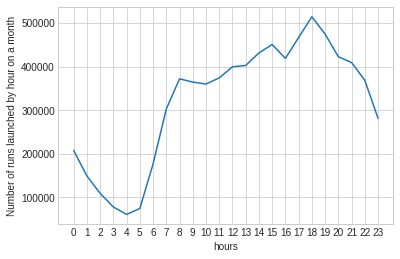

In [0]:
frequency_by_hour = []
runs = []
hour = pd.date_range("00:00", "23:00",freq="1H").time

for hour in hour:
  if hour == datetime.time(23, 0):
      runs = runs_2019_01[runs_2019_01['tpep_pickup_datetime'].dt.time.between(hour, (datetime.datetime.combine(datetime.date(1,1,1),hour) + datetime.timedelta(seconds=3599)).time())]
      frequency_by_hour.append(len(runs))
  else:
    runs = runs_2019_01[runs_2019_01['tpep_pickup_datetime'].dt.time.between(hour, (datetime.datetime.combine(datetime.date(1,1,1),hour) + datetime.timedelta(hours=1)).time())]
    frequency_by_hour.append(len(runs))

#print(frequency_by_hour)
hours=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] #x label

ax = plt.axes()

ax.plot(hours,frequency_by_hour)
plt.xticks(np.arange(min(hours), max(hours)+1, 1.0))
plt.ylabel("Number of runs launched by hour on a month")
plt.xlabel("hours")

